In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
path_train = 'data/train.csv'

In [3]:
df = pd.read_csv(path_train, delimiter=',')

In [4]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
total_nan = df.isnull().sum()

In [7]:
total_nan

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
df.four_g.value_counts()

four_g
1    1043
0     957
Name: count, dtype: int64

In [9]:
list_of_4G = df.four_g.value_counts().to_list()
list_of_4G

[1043, 957]

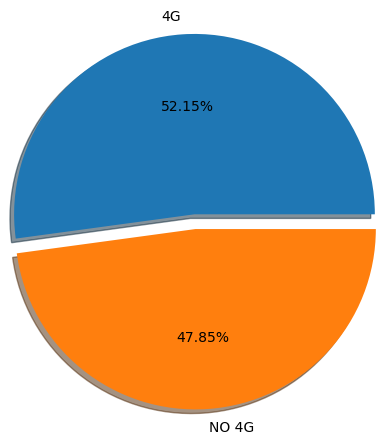

In [10]:
labels = ['4G','NO 4G']
plt.pie(list_of_4G,labels=labels,shadow=True,autopct='%1.2f%%',radius=1.22,explode=[.1,0])
plt.show()

In [11]:
corr = df.corr()

In [12]:
import seaborn as sns

<Axes: >

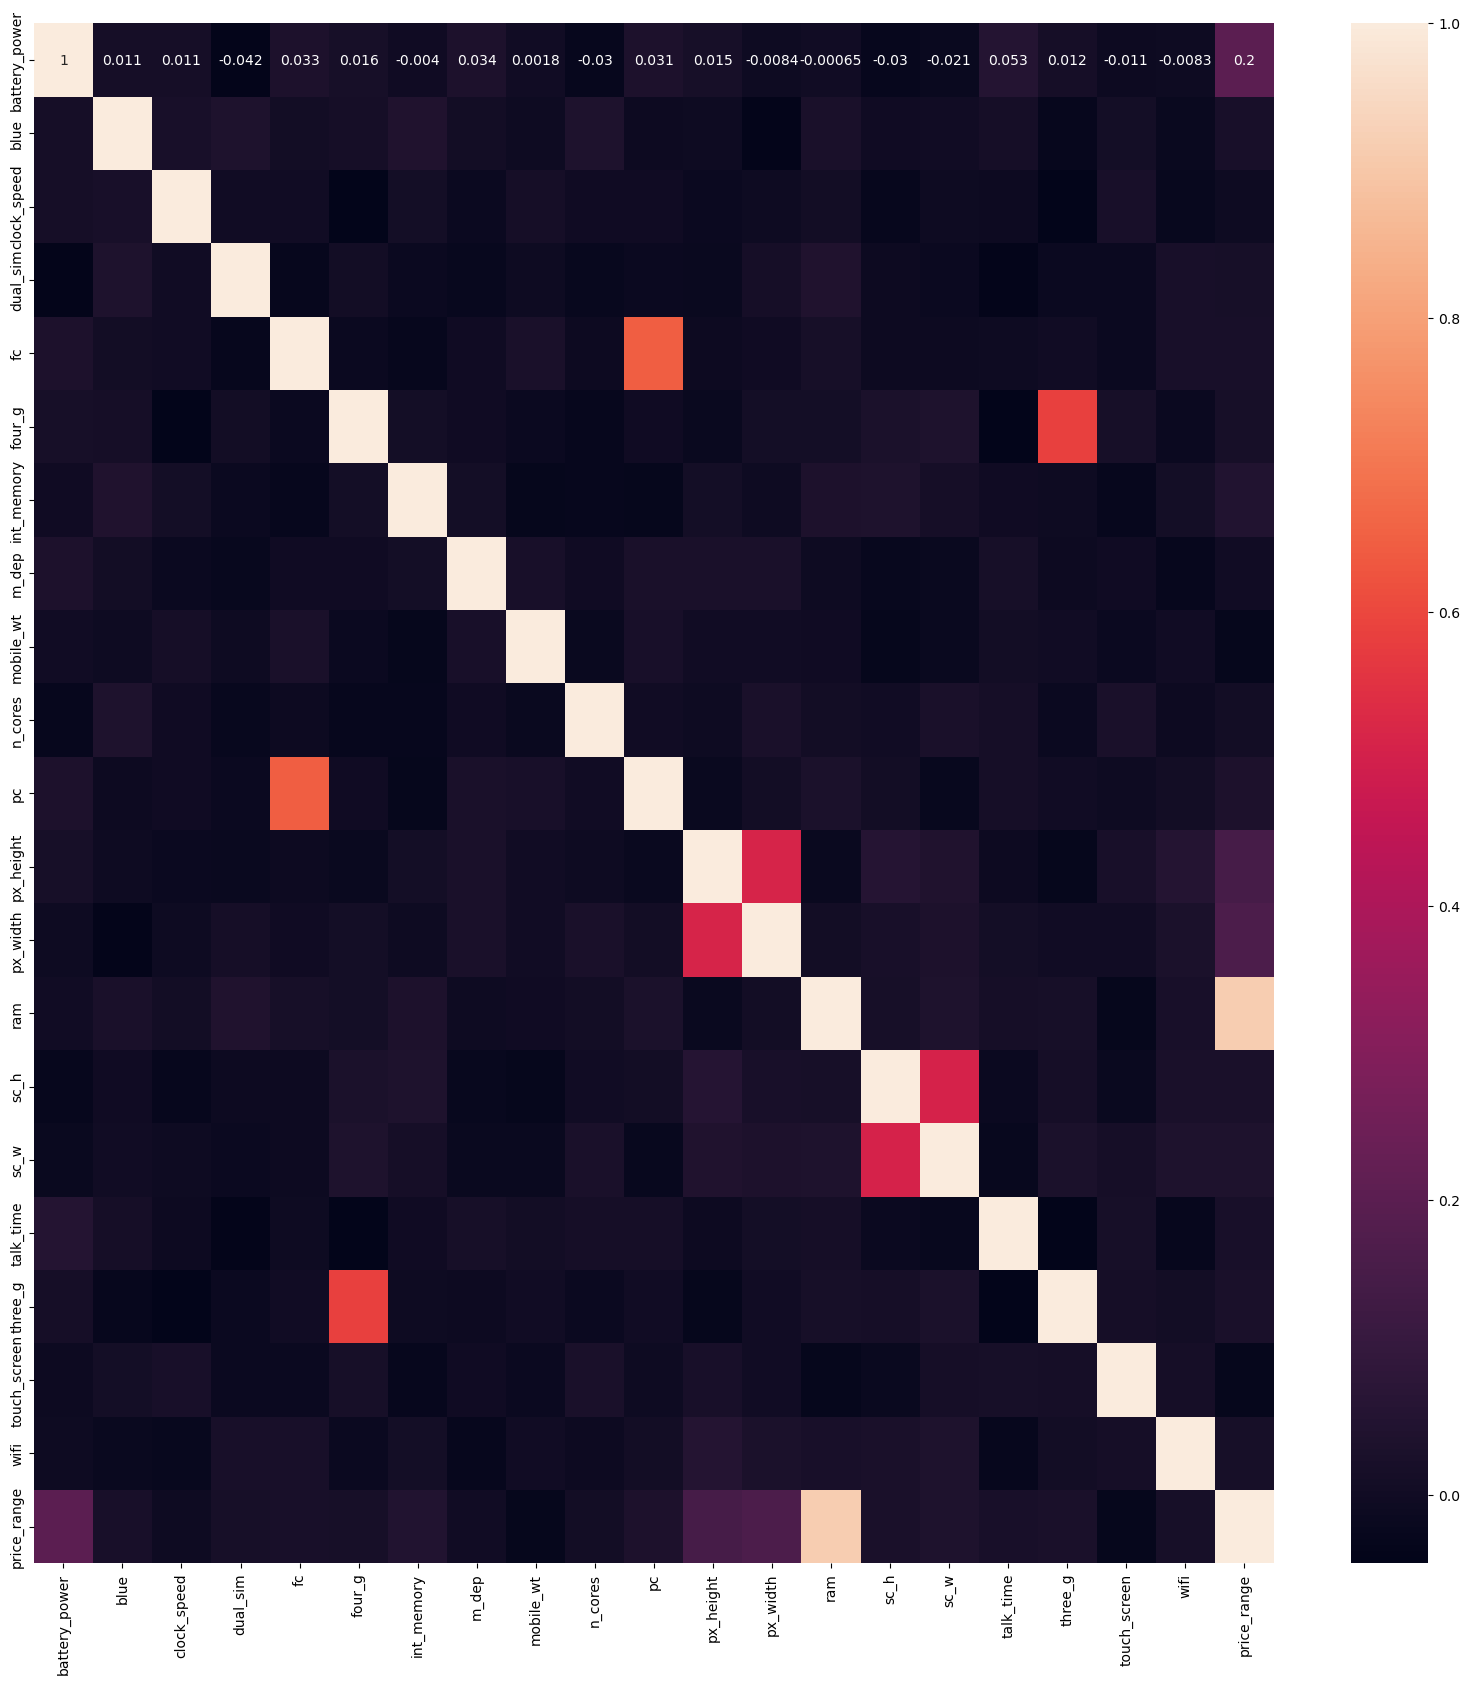

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['price_range'],axis=1)
y = df.price_range

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [20]:
svc = DecisionTreeClassifier(criterion='gini',max_depth=8, min_samples_leaf=8, min_samples_split=3)
#params = {'max_depth': list(range(1, 10)), 'min_samples_split': list(range(2, 10)), 'min_samples_leaf': list(range(1, 10)) }


In [21]:
#clf = GridSearchCV(svc, params)

In [22]:
svc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=3)

In [23]:
svc.predict(X_test)

array([1, 3, 0, 0, 3, 3, 3, 3, 1, 2, 2, 0, 1, 1, 2, 3, 2, 0, 3, 0, 2, 2,
       3, 3, 0, 2, 1, 3, 0, 3, 0, 3, 3, 0, 1, 1, 0, 3, 3, 2, 2, 3, 2, 1,
       1, 1, 1, 3, 3, 1, 0, 1, 0, 2, 3, 0, 3, 0, 1, 0, 0, 1, 1, 2, 1, 3,
       3, 2, 0, 2, 1, 3, 3, 0, 2, 1, 2, 2, 3, 3, 1, 1, 1, 2, 1, 0, 2, 3,
       3, 3, 2, 1, 1, 2, 3, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 3, 0,
       1, 3, 3, 3, 2, 1, 1, 3, 1, 1, 2, 1, 0, 1, 2, 2, 0, 1, 3, 0, 0, 3,
       3, 0, 0, 2, 2, 3, 3, 2, 2, 2, 3, 2, 1, 3, 2, 2, 3, 0, 3, 2, 3, 3,
       1, 3, 0, 2, 0, 0, 1, 2, 1, 3, 1, 0, 1, 3, 1, 1, 1, 3, 2, 3, 2, 1,
       3, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 3, 0, 1, 2, 2, 2, 1, 1, 0, 2, 1,
       2, 1, 1, 3, 1, 3, 1, 0, 2, 2, 3, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 3,
       0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 3, 2, 3, 2, 0, 2, 3, 1, 0,
       0, 2, 0, 1, 0, 2, 3, 3, 3, 3, 0, 1, 2, 3, 0, 3, 0, 0, 0, 3, 2, 2,
       1, 2, 3, 0, 1, 0, 0, 3, 0, 3, 1, 2, 3, 2, 1, 1, 1, 0, 0, 2, 1, 2,
       1, 3, 0, 0, 0, 1, 1, 2, 0, 2, 1, 2, 2, 3, 1,

In [24]:
acc = svc.score(X_test,y_test)
print("Accuracy:", acc*100,"%")

Accuracy: 81.0 %


In [25]:
path_test = 'data/test.csv'

In [26]:
df_test = pd.read_csv(path_test, delimiter=',')
df_test = df_test.drop('id',axis=1)

In [27]:
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [28]:
df_test_scaler = scaler.fit_transform(df_test)

In [29]:
predictions=svc.predict(df_test_scaler)

In [30]:
display(df_test)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [31]:
predictions

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 1, 3, 1, 0, 2,
       2, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 0, 1, 2, 0, 0,
       0, 1, 1, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 3, 0, 2, 2, 0, 2, 1, 2, 0, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 0, 2,
       1, 0, 3, 1, 2, 0, 3, 2, 1, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 2, 1, 2, 2,
       3, 2, 1, 2, 2, 3, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       2, 2, 1, 3, 3, 2, 3, 2, 3, 1, 2, 0, 2, 3, 1,

In [33]:
df_test['result'] = predictions